<a href="https://colab.research.google.com/github/dqminhv/fellowship_ai-nlp-challenge/blob/main/notebook/nlp_challenge_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Required Packages & Load Data

In [ ]:
#Ignore warnings in Google Colab
import warnings
# Ignore all warnings (not recommended in general)
warnings.filterwarnings("ignore")

In [ ]:
#Mount Google Drive to access the IMDB Review file
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Import required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
X_file_path = '/content/gdrive/MyDrive/Document/Data Science/Skills Development/fellowshipai/X.csv'
y_file_path = '/content/gdrive/MyDrive/Document/Data Science/Skills Development/fellowshipai/y.csv'

X = pd.read_csv(X_file_path)
y = pd.read_csv(y_file_path)

In [ ]:
#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensemble Method: Random Forest

In [ ]:
#Create a Random Forest Classifier and fit it with the training data
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

# Make predictions on test data
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred) / len(y_test)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.8314
Confusion Matrix:
[[0.4139 0.0822]
 [0.0864 0.4175]]


**To evaluate our model more accurately, we perform cross-validation and calculate the average performance of the model.**

In [ ]:
#cross validation
from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(rf, X, y, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", mean(scores))

Cross-validation scores: 0.8285


## Feature Importance

In [ ]:
# Get feature importances from the model
importances = rf.feature_importances_

# Sort features and importances together by importance (descending order)
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]

# Calculate cumulative importance
cumulative_importance = np.cumsum(sorted_importances)

In [ ]:
# Print 100 feature importances
for feature, importance in zip(X.columns[sorted_indices], sorted_importances):
    print(f"{feature}: {importance}")

bad: 0.02888932498965752
the worst: 0.017855594196935137
great: 0.017841433417961457
wast: 0.016862825116256773
worst: 0.015911491881227362
aw: 0.010468264024798645
love: 0.01004399076019285
bore: 0.009836427691990507
terribl: 0.008893695978378567
excel: 0.00783780830271379
noth: 0.00778986516307332
best: 0.006912193059862236
no: 0.006398532392301605
stupid: 0.006359273113766459
poor: 0.005771894503697654
wors: 0.005693920971267414
minut: 0.005217723663290844
horribl: 0.005212252480129725
even: 0.005077818682222288
just: 0.004907698666476082
beauti: 0.0048380607598525974
the best: 0.004688857364985274
perfect: 0.0044583738355312395
suppos: 0.004446148159506027
plot: 0.004414678379764899
enjoy: 0.004059587325889768
movi: 0.0038587667763126886
well: 0.0036995893839851923
as: 0.0036419923988273784
veri: 0.003531350173232273
have: 0.003371395015518911
whi: 0.0033247116531927284
script: 0.003309816997336748
perform: 0.003257981833751046
look like: 0.003185350548745772
but: 0.003144078987647

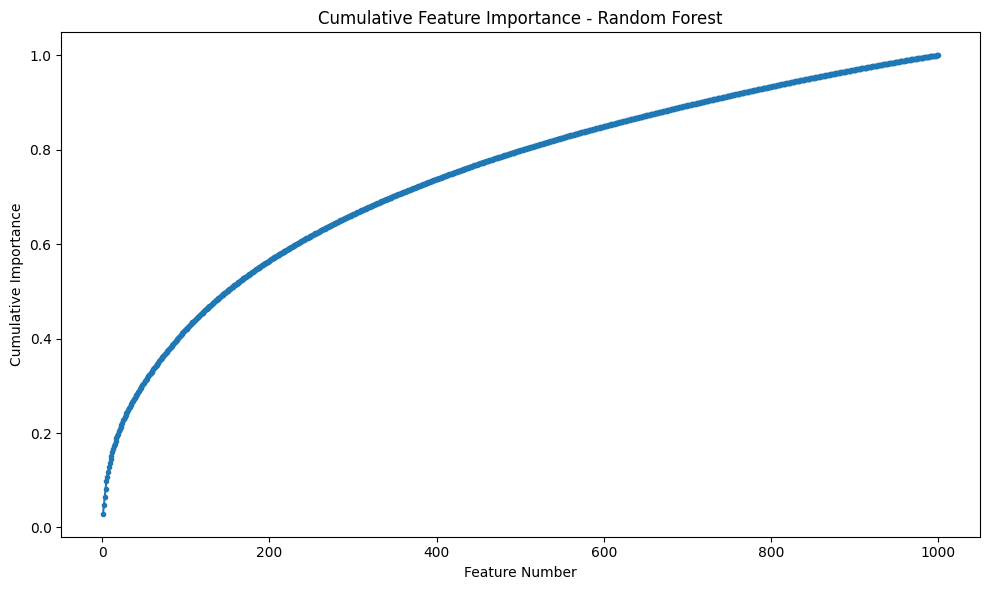

In [ ]:
# Plot cumulative feature importance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(sorted_importances) + 1), cumulative_importance, marker='.', linestyle='-', label='Cumulative Importance')
plt.xlabel('Feature Number')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Feature Importance - Random Forest')
plt.tight_layout()
plt.show()

**From the cummulative feature importance plot, we see that about 500 features account for 80%**

# Linear Model: Logistic Regression

In [ ]:
# Train the Logistic Regression model
lg = LogisticRegression(solver='liblinear')
lg.fit(X_train, y_train)

# Make predictions on new data
y_pred = lg.predict(X_test)

# Evaluate the model
accuracy2 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a confusion matrix
cm2 = confusion_matrix(y_test, y_pred) / len(y_test)
print("Confusion Matrix:")
print(cm2)

Accuracy: 0.8314
Confusion Matrix:
[[0.4227 0.0734]
 [0.0645 0.4394]]


**Perform cross-validation for more accurate model performance.**

In [ ]:
# Perform cross-validation
scores = cross_val_score(lg, X, y, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", mean(scores))

Cross-validation scores: 0.86184


## Hyper-parameter tunning

In [ ]:
#Hyper-parameter tunning for the random forest model
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from statistics import mean

In [ ]:
param_grid_lg = {
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag'],
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10]
}

In [ ]:
# Create the RandomizedSearchCV object
rand_search_lg = RandomizedSearchCV(lg, param_grid_lg, cv=5)

# Train the model with grid search
rand_search_lg.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg', 'sag']})

In [ ]:
# Get the best model and best parameters
best_model_lg = rand_search_lg.best_estimator_
best_params_lg = rand_search_lg.best_params_

In [ ]:
y_pred = best_model_lg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.8646


# Exporting Best Model

In [ ]:
#Export best model
import pickle
with open('best_model_lg.pkl', 'wb') as f:
    pickle.dump(best_model_lg, f)